In [1]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
time: 429 µs (started: 2024-04-13 09:38:46 +00:00)


In [2]:
# DATA : Images

# Donload manually images from google or from kaggle.com or build a image web crawler or using python libraries to scrape the images (bing)
# we will use 4th option for this

time: 412 µs (started: 2024-04-13 09:38:46 +00:00)


In [3]:
!pip install bing-image-downloader

time: 9.68 s (started: 2024-04-13 09:38:46 +00:00)


In [4]:
!mkdir images

time: 122 ms (started: 2024-04-13 09:38:55 +00:00)


In [5]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.10wallpaper.com/wallpaper/2560x1440/1802/Pretty_sunflower_flowers_plant_closeup_2560x1440.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpaperset.com/w/full/6/1/2/190995.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://external-preview.redd.it/19pzivrmy-sqMDGtG4WPe9STst_kGxmN9nWlHDAo3Ls.jpg?auto=webp&amp;s=946c9c34be43ae61a64ce6708c84624988182b29
[!] Issue getting: https://external-preview.redd.it/19pzivrmy-sqMDGtG4WPe9STst_kGxmN9nWlHDAo3Ls.jpg?auto=webp&amp;s=946c9c34be43ae61a64ce6708c84624988182b29
[!] Error:: HTTP Error 403: Blocked
[%] Downloading Image #3 from https://geeglenews.com/wp-content/uploads/2016/06/beautiful-sunflower-wallpapers-9.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-Uh1HTy66p7I/TkY6vYCvWjI/AAAAAAAAD0c/ny_MXcFowLE/s1600/sunflower_

In [6]:
downloader.download("rugby ball leather",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/rugby ball leather


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.kraveantiques.co.uk/images/products/Brown-Rugby-Ball-1455-12.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images.esellerpro.com/2718/I/876/62/GIL-82001001 New.jpg
[!] Issue getting: http://images.esellerpro.com/2718/I/876/62/GIL-82001001 New.jpg
[!] Error:: URL can't contain control characters. '/2718/I/876/62/GIL-82001001 New.jpg' (found at least ' ')
[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0226/2169/products/Chromexcel_2048x2048_V1_1024x1024.jpg?v=1511272698
[%] File Downloaded !

[%] Downloading Image #3 from http://ceefc02649d25ca315ac-ef93c2ad0985f7464ef79b04e64427fa.r18.cf2.rackcdn.com/product_images/3600/Rugby2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn-s3.touchofmodern.com/products/001/323/791/747ec1b9d79741dfdc64e98bedc689fc_large.jpg?1544121098
[%] F

In [7]:
downloader.download("ice cream cone",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/ice cream cone


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://cdiabetes.com/wp-content/uploads/2014/07/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.procaffenation.com/wp-content/uploads/2017/04/22-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.creativemarket.com/0.1.0/ps/7468873/1820/2862/m1/fpnw/wm1/en4hrj6n9vxfmcipirsxu0rgujs058nqxn3cteatfuq0lbgrwwequzjiisbj3ymi-.jpg?1576506367&amp;s=19603b99a32c1de5c0fd1e690ba16b1f
[!] Issue getting: https://images.creativemarket.com/0.1.0/ps/7468873/1820/2862/m1/fpnw/wm1/en4hrj6n9vxfmcipirsxu0rgujs058nqxn3cteatfuq0lbgrwwequzjiisbj3ymi-.jpg?1576506367&amp;s=19603b99a32c1de5c0fd1e690ba16b1f
[!] Error:: HTTP Error 502: Bad Gateway
[%] Downloading Image #3 from https://www.courtneyssweets.com/wp-content/uploads/2016/10/Chocolate-Filled-Ice-Cream-Cones-1.jpg
[%] File Downloaded !

[%] Downloading Im

# Preprocessing

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread  # we can also use open cv
from skimage.transform import resize  # to get all images in one specific size

time: 1.06 s (started: 2024-04-13 09:40:50 +00:00)


## we need data in two different format input and output.
image is made of pixel - height and width, or row and col, we have to flatten it out

How we can convert matrix to vector -  we will use flatten()

In [9]:
# we will do following task - 1. resize , 2. Flatten

target = [] # our target output
images = [] # matrix
flat_data = [] # vector

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone'] # index are 0, 1 , 2 here

# now let's iterate through all to get all images correctly

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # label encoding the value
  path = os.path.join(DATADIR,category) # create path to use all the images
  # now to read all images in new path
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)  # height, weidth and RGB that is 3
    #plt.imshow(img_array) # to show one specific image, add break at the end for this

    img_resized = resize(img_array,(150,150,3)) # normalizes value from 0 to 1
    flat_data.append(img_resized.flatten()) # flatten()
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 44 s (started: 2024-04-13 09:40:51 +00:00)


In [10]:
len(flat_data[0])  # 150*150*3 = 67500

67500

time: 2.61 ms (started: 2024-04-13 09:41:35 +00:00)


In [11]:
len(target)

90

time: 2.44 ms (started: 2024-04-13 09:41:35 +00:00)


<BarContainer object of 3 artists>

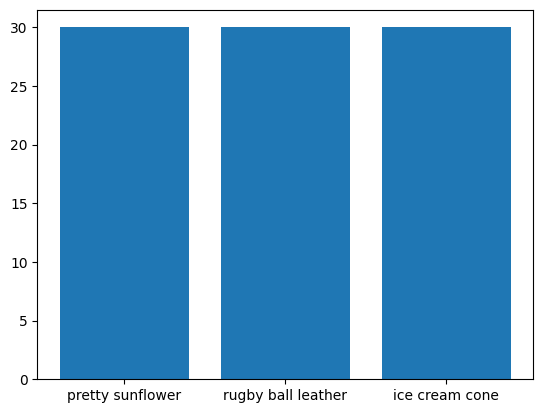

time: 286 ms (started: 2024-04-13 09:41:35 +00:00)


In [12]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

# Split data into trainig and testing

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=42)

time: 242 ms (started: 2024-04-13 09:41:35 +00:00)


In [14]:
# since it is a classification problem, here we can use SVM
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']}, {'C':[1,10,100,1000],'gamma':[0.001, 0.0001],'kernel':['rbf']}]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 53.8 s (started: 2024-04-13 09:41:35 +00:00)


In [15]:
# evaluate model
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2])

time: 175 ms (started: 2024-04-13 09:42:29 +00:00)


In [16]:
y_test

array([1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2,
       2, 1, 1, 0, 2])

time: 6.6 ms (started: 2024-04-13 09:42:29 +00:00)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 504 µs (started: 2024-04-13 09:42:29 +00:00)


In [18]:
accuracy_score(y_pred, y_test)

0.7407407407407407

time: 8.76 ms (started: 2024-04-13 09:42:29 +00:00)


In [19]:
confusion_matrix(y_pred, y_test)

array([[6, 0, 1],
       [2, 7, 1],
       [1, 2, 7]])

time: 8.66 ms (started: 2024-04-13 09:42:30 +00:00)


In [20]:
# check how this model is working - use real time image

time: 363 µs (started: 2024-04-13 09:42:30 +00:00)


In [21]:
# first save the model
import pickle
pickle.dump(clf, open('img_model.p','wb'))

time: 44.1 ms (started: 2024-04-13 09:42:30 +00:00)


In [22]:
model = pickle.load(open('img_model.p','rb'))

time: 11.1 ms (started: 2024-04-13 09:42:30 +00:00)


enter urlhttps://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcT9O3E0-j2P8uByt3f5pzmUpNJ3T7vxM6QzDsZk27fRT9CrwOgzsasUzlxQfebrMs-O77lZYChHZgKCLnkza9UKRvcYDAzV7hWtG5WA85oVlmItvfB7RIGx
(431, 450, 3)
PREDICTED OUTPUT: ice cream cone


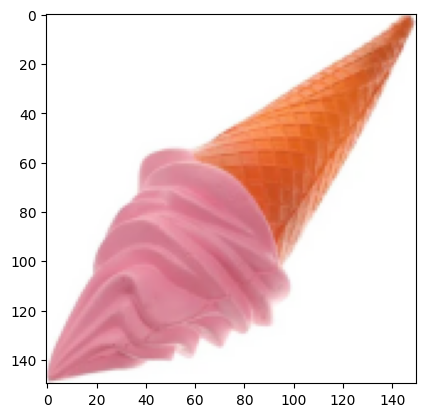

time: 4min (started: 2024-04-13 09:42:30 +00:00)


In [23]:
# test brand new image
flat_data = []
url = input('enter url')
img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

# Deployment

In [24]:
!pip install streamlit

!pip install pyngrok

from pyngrok import ngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
time: 15.7 s (started: 2024-04-13 09:46:30 +00:00)


# Deployment
1. webpage - HTML/CSS/JS - flask/Django
2. webapp - Streamlit/Dash
3. mobile app - Kotlin/java

In [25]:
import subprocess

# Replace YOUR_AUTHTOKEN with your actual ngrok authtoken
command = "ngrok authtoken 2f1OpEFekmOusOxPT10Z5Ps4WWp_gzz5a9QJo6iTN6djrtCQ"
subprocess.run(command, shell=True)


CompletedProcess(args='ngrok authtoken 2f1OpEFekmOusOxPT10Z5Ps4WWp_gzz5a9QJo6iTN6djrtCQ', returncode=0)

time: 1.59 s (started: 2024-04-13 09:46:46 +00:00)


In [26]:
# here we will use streamlit, pyngrok- can taken url



time: 264 µs (started: 2024-04-13 09:46:48 +00:00)


In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("choose an image....", type="jpg")

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption='uploded_Image')

  if st.button('PREDICT'):
    CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']
    st.write('RESULT.....')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img, (150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)


    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    #st.write(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')



Writing app.py
time: 1.98 ms (started: 2024-04-13 09:46:48 +00:00)


In [28]:
# to run this in background, we will use nohup for this

!nohup streamlit run app.py &



nohup: appending output to 'nohup.out'
time: 109 ms (started: 2024-04-13 09:46:48 +00:00)


In [29]:
ngrok.kill()

time: 501 µs (started: 2024-04-13 09:46:48 +00:00)


In [30]:
url = ngrok.connect(8501)
print("NGROK URL:", url)

NGROK URL: NgrokTunnel: "https://6592-35-204-31-166.ngrok-free.app" -> "http://localhost:8501"
time: 561 ms (started: 2024-04-13 09:46:48 +00:00)


In [31]:
# we can upload it on
# AWS, Azure, GCP, Heroku - free platform for deloying

time: 309 µs (started: 2024-04-13 09:46:49 +00:00)


time: 17 ms (started: 2024-04-13 09:46:49 +00:00)
